In [41]:
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
import numpy as np
pd.set_option('display.max_columns', 500)
%matplotlib inline
df = pd.read_csv('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv', index_col=0)
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


In [42]:
df1 = df.replace({'default': {'No': 0, 'Yes': 1}})
df = df1.replace({'student': {'No': 0, 'Yes': 1}})
df.head()

,default,student,balance,income
1,0,0,729.526495,44361.625074
2,0,1,817.180407,12106.134700
3,0,0,1073.549164,31767.138947
4,0,0,529.250605,35704.493935
5,0,0,785.655883,38463.495879


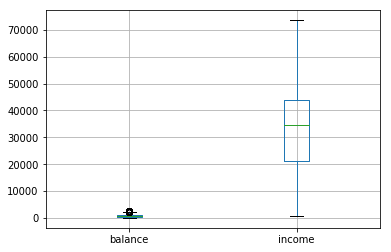

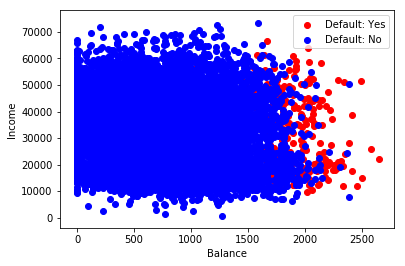

In [49]:
#Boxplots
df.boxplot(column=['balance','income'])
plt.show()

#Scatter plot
plt.figure()
plt.scatter(df.loc[df['default'] == 1, 'balance'] , df.loc[df['default'] == 1, 'income'] , color='r', label='Default: Yes')
plt.scatter(df.loc[df['default'] == 0, 'balance'] , df.loc[df['default'] == 0, 'income'], color = 'b', label='Default: No')
plt.ylabel('Income')
plt.xlabel('Balance')
plt.legend()

Coefficient of each feature: [[  5.21364373e-03   1.33105705e-05]]
Training accuracy: 0.974
Test accuracy: 0.972

Area under the curve of the ROC: 0.945017487608


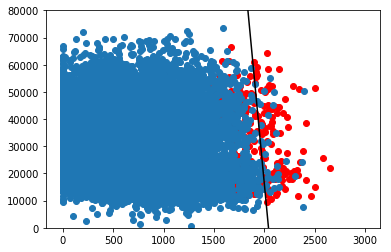

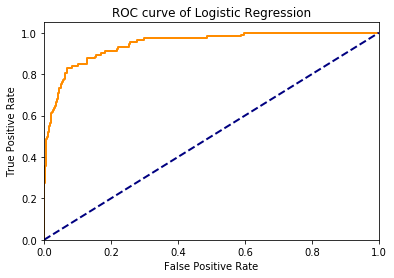

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc

X = df.drop(['default', 'student'],axis=1)
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = LogisticRegression(penalty='l1', C=1)    
clf.fit(X_train, y_train)

print('Coefficient of each feature:', clf.coef_)
print('Training accuracy:', clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))
print('');
    
plt.figure()
plt.ylim(0,80000)
plt.scatter(df.loc[df['default'] == 1, 'balance'] , df.loc[df['default'] == 1, 'income'] , color='r')
plt.scatter(df.loc[df['default'] == 0, 'balance'] , df.loc[df['default'] == 0, 'income'] , color = 'b')

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 3000)
yy = a * xx - (clf.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-')

pred = clf.predict_proba(X_test)

fpr, tpr, thres = roc_curve(y_test, pred[:,1])
print('Area under the curve of the ROC:',auc(fpr, tpr))

plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression')
plt.show()

Coefficients: 
 [ -8.90196586e-03   1.26075953e-04   7.06358539e-08]
Area under the curve of the ROC: 0.945609092943


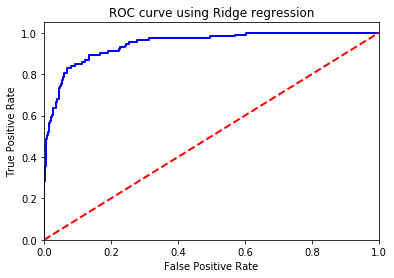

Text(0.5,0,'Student')

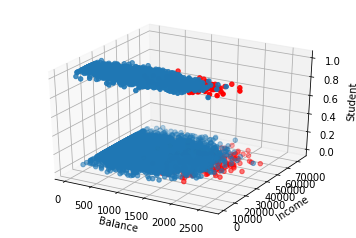

In [52]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import Ridge

X = df.drop(['default'],axis=1)
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

regr = Ridge(alpha=0.001)
regr.fit(X_train, y_train)
print('Coefficients: \n', regr.coef_)

pred = regr.predict(X_test)

fpr, tpr, thres = roc_curve(y_test, pred)
print('Area under the curve of the ROC:',auc(fpr, tpr))

plt.figure()
plt.plot(fpr, tpr, color='blue',lw=2)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve using Ridge regression')
plt.show()

#Scatter plot

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X[X.columns[1]]
ys = X[X.columns[2]]
zs = X[X.columns[0]]

ax.scatter(xs[y==1],ys[y==1],zs[y==1],color='r')
ax.scatter(xs[y==0],ys[y==0],zs[y==0])
plt.xlabel('Balance')
plt.ylabel('Income')
ax.set_zlabel('Student')

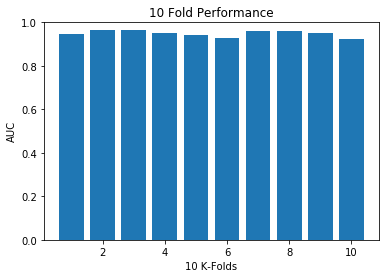

Mean AUC between all the K-Folds:  0.949146858049
Std AUC between all the K-Folds:  0.0133314752998


In [54]:
from sklearn.cross_validation import cross_val_score 
 
scores = cross_val_score(regr, X, y, cv=10, scoring='roc_auc')

plt.ylim([0,1])
plt.xlabel('10 K-Folds')
plt.ylabel('AUC')
plt.title('10 Fold Performance')
plt.bar(range(1,11),scores)
plt.show()

print('Mean AUC between all the K-Folds: ',scores.mean())
print('Std AUC between all the K-Folds: ',scores.std())

In [55]:
from sklearn import tree
import graphviz

clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)

data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns.values,
                         filled=True, rounded=True,  
                         special_characters=True) 

Graph = graphviz.Source(data)

#Comparing the performance of Logistic Regression and Decision Tree

#Logistic Regression
pred = regr.predict(X_test)

fpr1, tpr1, thres1 = roc_curve(y_test, pred)
print('Log Reg: Total Area of ROC under curve ',auc(fpr1, tpr1))

plt.figure()
plt.plot(fpr1, tpr1, color='blue',lw=2, label='Logistic Regression')

#Dec Tree
clf.fit(X_train, y_train)
pred = clf.predict_proba(X_test)

fpr2, tpr2, thres2 = roc_curve(y_test, pred[:,1])
print('Dec Tree: Area under the curve of the ROC ',auc(fpr2, tpr2))

plt.plot(fpr2, tpr2, color='darkgreen',lw=2, label='Decision Tree')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Compare Performance between Logistic Regression and Decision Tree')
plt.legend(loc="lower right")
plt.show()

ModuleNotFoundError: No module named 'graphviz'

In [56]:
Graph

NameError: name 'Graph' is not defined

Optimal Depth:  4
Area under curve 0.936164864774


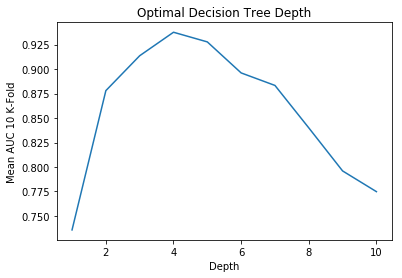

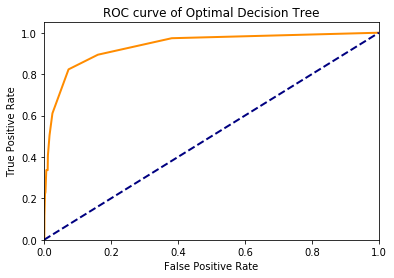

In [59]:

from sklearn.model_selection import train_test_split

scores=[]

depths = range(1,11)
for n in depths:
    regr = tree.DecisionTreeClassifier(max_depth=n)
    scores.append(cross_val_score(regr, X, y, cv=10, scoring='roc_auc').mean())

plt.figure()
plt.plot(depths, scores)
plt.xlabel('Depth')
plt.ylabel('Mean AUC 10 K-Fold')
plt.title('Optimal Decision Tree Depth')

opt_depth = scores.index(max(scores))+1

print('Optimal Depth: ',opt_depth)

#AUC ROC of optimal depth

regr = tree.DecisionTreeClassifier(max_depth=opt_depth)
regr.fit(X_train, y_train)
pred = regr.predict_proba(X_test)

fpr, tpr, thres = roc_curve(y_test, pred[:,1])
print('Area under curve',auc(fpr, tpr))

plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Optimal Decision Tree')
plt.show()